In [1]:
#%matplotlib notebook       
import math                # First line is to enable inline animation in jupyter notebook
import numpy as np         # The rest are just python libraries that I need for certain steps below
import random
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.animation as animation

Total M for lattice1: -1.0
Total M for lattice2: -1.0
Sum of lattice1: -36
Sum of lattice2: -36


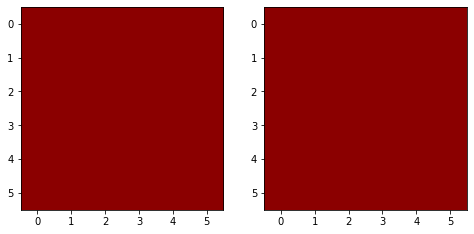

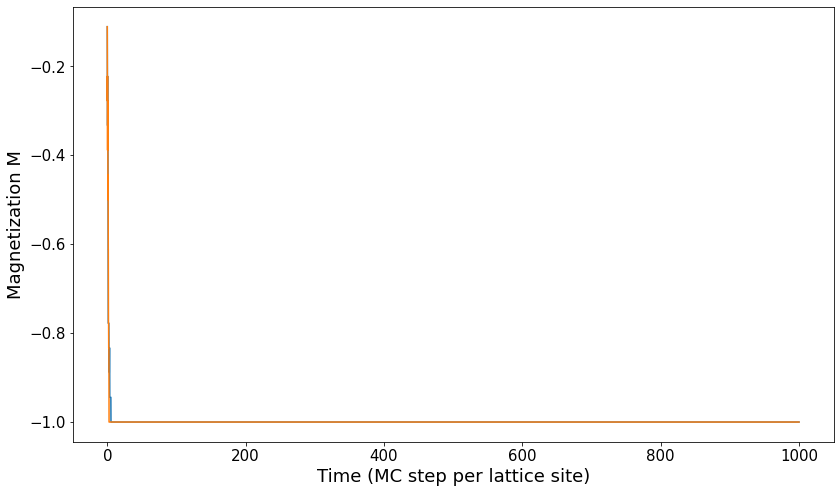

In [3]:
def initialize_array_lattice(lattice):   # Calling this function randomly populates the lattice 
    for i in range(0,size):                    # with 1's and -1's, it was initially just zeros
        for j in range(0,size):
            if random.random() < 0.5:          # random.random() is a function that generates random numbers
                lattice[i,j] = int(1)          # between 0 and 1, using this to randomly decide 1 or -1
            else:
                lattice[i,j] = int(-1)
    return lattice                             # nan = not a number, part of the math library. I'm 
                                               # basically returning nothing, the function just creates                                        # the 2-D array

def deltaE(i,j,lattice):                              # Function to calculate differrence in energy when I flip
    if i == 0:                                # a dipole (see Metropolis Algorithm)
        up = lattice[size-1,j]
    else:
        up = lattice[i-1,j]                   # The reason for all the if statement is to implement
    if i == size-1:                           # periodic boundary condition
        down = lattice[0,j]
    else:
        down = lattice[i+1,j]
    if j == 0:
        left = lattice[i,size-1]              # Formula for difference in energy is:
    else:                                     # 2*(spin of main dipole)*(sum of neighboring spins)
        left = lattice[i,j-1]
    if j == size-1:
        right = lattice[i,0]
    else:
        right = lattice[i,j+1]                
    return 2*lattice[i,j]*(up+down+left+right)

def metropolis(lattice): 
    lattice = initialize_array_lattice(lattice) 
    
    M = np.zeros(mc_step+1)
    M[0] = sum(sum(lattice))                             # loop to run through 100*size^(2) so each dipole
    
    for n in range(0, mc_step):                           # has the chance to be flipped 100 times.
        i = random.randint(0,size-1)                        
        j = random.randint(0,size-1)                        # Picking a random dipole between 0 and size
        
        E_diff = deltaE(i,j,lattice)                                # Calulating Energy Difference
        if E_diff <= 0:
            lattice[i,j] *= -1                              # Flip if E <= 0 (See Metropolis Algorithm)
            M[n+1] = M[n] + 2*lattice[i,j]
        else:
            if np.random.uniform() < math.exp(-E_diff/T):       # If E > 0, flip using Boltzmann weight
                lattice[i,j] *= -1
                M[n+1] = M[n] + 2*lattice[i,j]
            else:
                M[n+1] = M[n]
                continue
    return lattice, M


size = 6                                               # np.zeros creates a size x size array with zeros.
T = 0.1                                                 # Calling the initialize array function.
mc_step = 1000*size**2

# Create empty lattice
emptylattice1 = np.zeros([size,size], dtype=int)
emptylattice2 = np.zeros([size,size], dtype=int)

# Feed empty lattice into the Metropolis function and it outputs "lattice1" and "M1", both are arrays
lattice1, M1 = metropolis(emptylattice1)
lattice2, M2 = metropolis(emptylattice2)

print('Total M for lattice1:',M1[-1]/size**2)
print('Total M for lattice2:',M2[-1]/size**2)
print('Sum of lattice1:',sum(sum(lattice1)))
print('Sum of lattice2:',sum(sum(lattice2)))


# Show image of lattices
fig1 = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
cmap = mpl.colors.ListedColormap(['darkred','blue'])    # This just creates the colormap needed for plotting
plt.imshow(lattice1,cmap=cmap,aspect='equal')            # imshow displays data as image, first argument is 
                                                        # your data, in this case, the lattice array    
plt.subplot(1,2,2)
plt.imshow(lattice2,cmap=cmap,aspect='equal')    



# Graphing the magnetization, simply create x-axis (time) and plot M1 M2 given above

fig3 = plt.figure(figsize=(30,8))
ax = fig3.add_subplot(121)
t = np.linspace(0,mc_step+1,mc_step+1)
plt.plot(t/size**2, M1/size**2, '-',label='lattice1')
plt.plot(t/size**2, M2/size**2, '-',label='lattice2')
plt.xlabel("Time (MC step per lattice site)",fontsize=18)
plt.ylabel("Magnetization M",fontsize=18)
ax.tick_params(labelsize=15)
#plt.legend(fontsize=15)

<IPython.core.display.Javascript object>


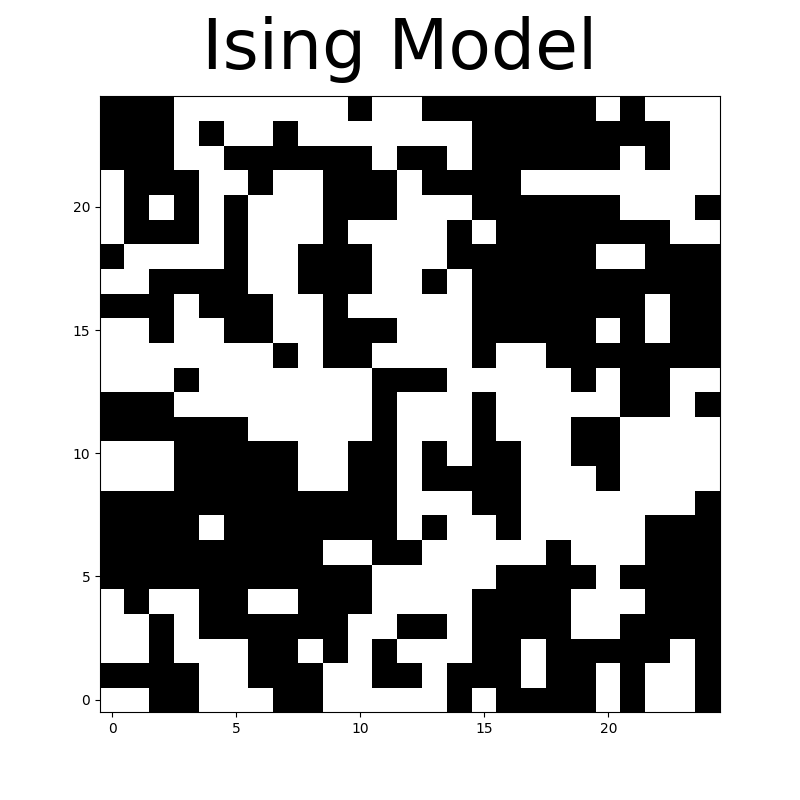

In [2]:
# This is the code to animate the Ising model. Note that this section of code is a standalone, does not require
# anything from above other than the imported libraries

def deltaE(i,j):
    s = lattice[(i+1) % l,j] + lattice[i, (j+1) % l] + lattice[(i-1) % l, j] + lattice[i,(j-1) % l]
    return 2*lattice[i,j]*s
    
def mcstep(*args):
    i = random.randint(0,l-1)       ## random.randint(0, l-1) 0 to l-1 inclusive
    j = np.random.randint(l)        ## np.random.randint(l), l exclusive, same as above, different function
    E_diff = deltaE(i,j)
    if E_diff <= 0:
        lattice[i,j] *= -1
    else:
        if random.random() < math.exp(-E_diff/T):
            lattice[i,j] *= -1
    grid.set_array(lattice.ravel())   # Set_array is how colormap updates using the array in the argument
    return grid,                      # the ravel function flattens the array into 1D, it's just a requirement
                                      # "grid," needs a comma because it need to return a tuple, why a tuple
                                      # exactly? Not sure. Could also use notation "[grid]"
                                    
def init_spin_config(opt):
    if opt == 'inf':
        lattice = np.random.randint(0,2,size=(l,l)) # lxl lattice with random spin configuration
        lattice[lattice==0] = -1
        return lattice
    
    if opt == 'zero':                           ## lxl lattice with +1 
        lattice = np.full( (l,l), 1, dtype=int)    ## argument: shape, value, value_type
        return lattice


l = 25 #Lattice dimension
J = 0.3 #Interaction strength
T = 3.5 #Temperature, be sure to change it depending on initial lattice temperature
N = 20000 #Number of iterations of MC step
opt = 'inf' 
    
lattice = init_spin_config(opt)
# print(sum(sum(lattice)))

fig = plt.figure(figsize=(8,8),dpi=80) # figsize in inches, dpi = dots (pixels) per inch
fig.suptitle("Ising Model", fontsize=50) # suptitle = super title, for when you have multi-subplots
#X, Y = np.meshgrid(range(l), range(l))   # Creating my domain and range of grid
grid = plt.pcolormesh(range(l),range(l),lattice,shading='nearest',cmap = "gray", vmin=-1, vmax=1) 
                                    # Create grid color plot with dimensions X,Y and values from lattice
ani = animation.FuncAnimation(fig, mcstep, frames = N, interval = 5, blit = True, repeat = False)
            # Arugments: figure object, function to call for each frame of animation, # of frames/# of times
            # to call the animate function, delay between frames in milliseconds, enable blit so funcAnimation
            # won't redraw the whole thing every frame, it'll just update it.
            
            # Keeping the interval too low (i.e. < 1) might cause the animation to lag
            
# if you're running animation in jupyter, make sure %matplotlib notebook is uncommented up top

In [ ]:
# Check what writers you have

# import matplotlib
# print(matplotlib.animation.writers.list())

In [13]:
# Save the animation as a gif, the single flip dynamic is really highlighted in gif format

# writergif = animation.PillowWriter(fps=150)
# ani.save('filename.gif',writer=writergif)